# 1) Import Libraries

In [1]:
    import re
    import datetime
    import calendar
    from math import sqrt

    import pandas as pd
    import numpy as np
    import matplotlib
    import matplotlib.pyplot as plt
    %matplotlib inline

In [2]:
import seaborn as sns
sns.set_style('ticks')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 2) Read Data

In [4]:
def parse_date_string(x):
    dt_obj = datetime.datetime.strptime(x, "%b-%y")
    day=calendar.monthrange(dt_obj.year, dt_obj.month)[1]
    last_date = '{}'.format(day)+datetime.datetime.strftime(dt_obj, "-%m-%Y")
    return datetime.datetime.strptime(last_date, "%d-%m-%Y")

In [5]:
df = pd.read_csv('Cloud Price Data.csv')
display(df.head())

,Months,Price
0,Jan-19,32USD
1,Feb-19,57USD
2,Mar-19,63USD
3,Apr-19,82USD
4,May-19,75USD


In [6]:
#Change Months column from string to datetime format
df['Months'] = df['Months'].apply(lambda x: parse_date_string(x))

df.set_index('Months', inplace=True)

#Change the Price Column to integers
df['Price']=df['Price'].apply(lambda x:float(re.match(r'[0-9]*', x).group()))
df

,Price
Months,
2019-01-31,32.0
2019-02-28,57.0
2019-03-31,63.0
2019-04-30,82.0
2019-05-31,75.0
2019-06-30,95.0
2019-07-31,120.0
2019-08-31,152.0
2019-09-30,164.0


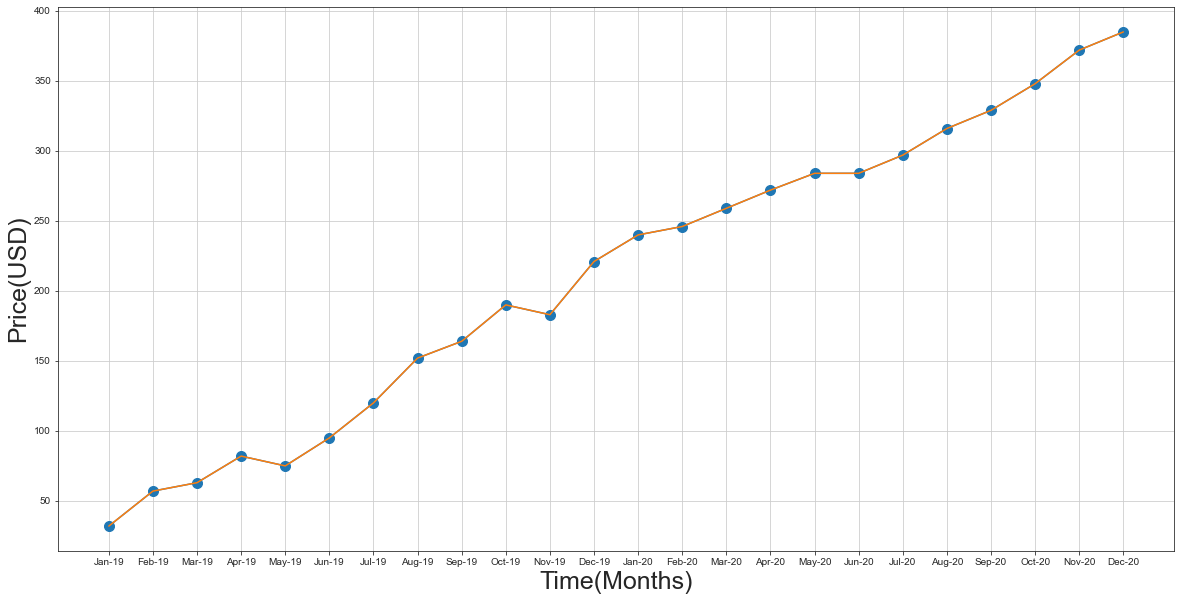

In [7]:
fig = plt.figure(figsize=(20,10))
plt.xlabel('Time(Months)', fontsize=25)
plt.ylabel('Price(USD)', fontsize=25)
plt.grid()
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Price'], '-o', markersize=10)
plt.plot(pd.Series(df.index).apply(lambda x: datetime.datetime.strftime(x, "%b-%y")), df['Price'], )
#plt.savefig('test.jpeg')
plt.show()

# 3)Split the data into train and test data

In [8]:
n_obs = df.shape[0]

train_split_percentage = 0.85

train_data = df.iloc[:round(n_obs * train_split_percentage)]
test_data = df.iloc[round(n_obs * train_split_percentage):]

In [9]:
# Display the Test and train data
print(train_data.shape)
print(test_data.shape)

(20, 1)
(4, 1)


In [10]:
display(train_data.tail())
display(test_data.head())

,Price
Months,
2020-04-30,272.0
2020-05-31,284.0
2020-06-30,284.0
2020-07-31,297.0
2020-08-31,316.0


,Price
Months,
2020-09-30,329.0
2020-10-31,348.0
2020-11-30,372.0
2020-12-31,385.0


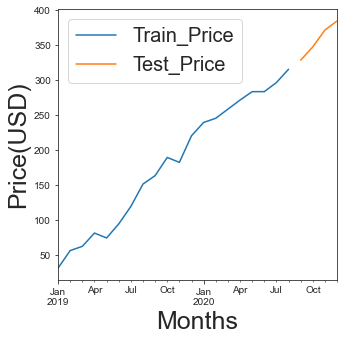

In [11]:
plt.figure(figsize=(5,5))
plt.xlabel('Time(Time Duration)', fontsize=25)
plt.ylabel('Price(USD)', fontsize=25)
plt.rc('legend',fontsize=20)
train_data['Price'].rename('Train_Price').plot(legend=True)
test_data['Price'].rename('Test_Price').plot(legend=True)

# 4)Finding differencing order "d"

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adf_test_result = adfuller(df['Price'])
adf_test_result

(-0.06645410717675022,
 0.9526790120349874,
 1,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 108.26411910857905)

In [14]:
adftest_result = pd.Series(adf_test_result[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result

Adf test statistic        -0.066454
p-value                    0.952679
number of lags             1.000000
number of observations    22.000000
dtype: float64

In [15]:
from statsmodels.tsa.statespace.tools import diff

In [16]:
df['Price'].head()

Months
2019-01-31    32.0
2019-02-28    57.0
2019-03-31    63.0
2019-04-30    82.0
2019-05-31    75.0
Name: Price, dtype: float64

In [17]:
df['Price'].shift(1).head()

Months
2019-01-31     NaN
2019-02-28    32.0
2019-03-31    57.0
2019-04-30    63.0
2019-05-31    82.0
Name: Price, dtype: float64

In [18]:
diff(df['Price'], k_diff=1)

Months
2019-02-28    25.0
2019-03-31     6.0
2019-04-30    19.0
2019-05-31    -7.0
2019-06-30    20.0
2019-07-31    25.0
2019-08-31    32.0
2019-09-30    12.0
2019-10-31    26.0
2019-11-30    -7.0
2019-12-31    38.0
2020-01-31    19.0
2020-02-29     6.0
2020-03-31    13.0
2020-04-30    13.0
2020-05-31    12.0
2020-06-30     0.0
2020-07-31    13.0
2020-08-31    19.0
2020-09-30    13.0
2020-10-31    19.0
2020-11-30    24.0
2020-12-31    13.0
Name: Price, dtype: float64

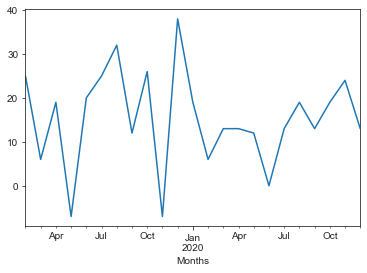

In [19]:
diff(df['Price'], k_diff=1).plot()

In [20]:
adf_test_result_new = adfuller(diff(df['Price'], k_diff=1))
adf_test_result_new

(-6.14577303902978,
 7.774044677109174e-08,
 0,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 96.08325851295903)

In [21]:
adftest_result_new = pd.Series(adf_test_result_new[:4], index=["Adf test statistic", "p-value", "number of lags", "number of observations"])
adftest_result_new

Adf test statistic       -6.145773e+00
p-value                   7.774045e-08
number of lags            0.000000e+00
number of observations    2.200000e+01
dtype: float64

In [22]:
from pandas.plotting import lag_plot

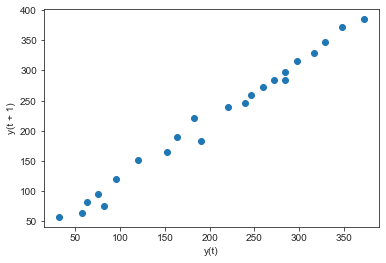

In [23]:
#still very high positive correlation
lag_plot(df['Price'])

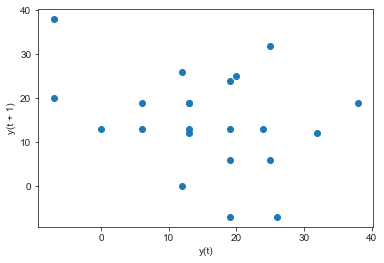

In [24]:
#And now here there is no correlation, since we have taken differencing of the series with a lag of 1
lag_plot(diff(df['Price'], k_diff=1))

# 5) Finding the MA term (q)

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

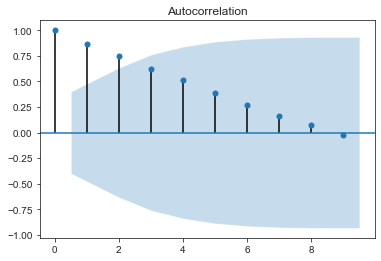

In [26]:
plot_acf(df['Price'], lags=9);

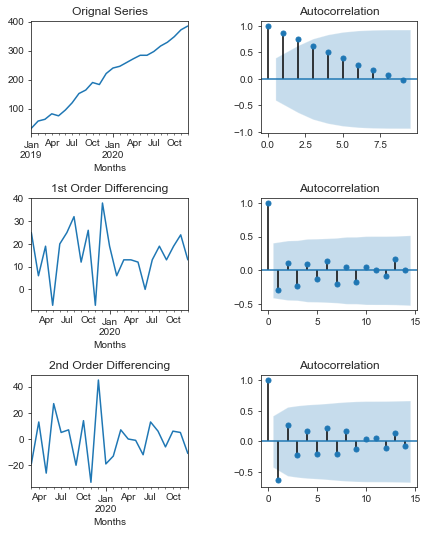

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(7,8))

fig.tight_layout(pad=4.5)

df['Price'].plot(ax=axs[0,0], title="Orignal Series")
plot_acf(df['Price'], lags=9, title="Autocorrelation", ax=axs[0][1])

diff(df['Price'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_acf(diff(df['Price'], k_diff=1), title="Autocorrelation", ax=axs[1][1])

diff(df['Price'], k_diff=2).plot(ax=axs[2,0], title="2nd Order Differencing")
plot_acf(diff(df['Price'], k_diff=2), title="Autocorrelation", ax=axs[2][1])
plt.savefig('test2.jpeg')
plt.show()

# 6) Finding the AR term (p)

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

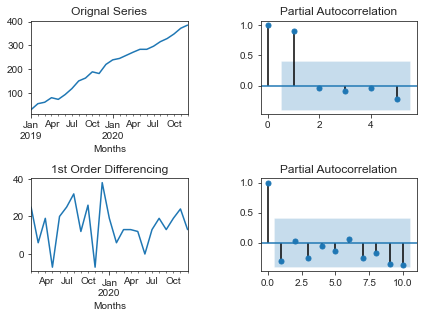

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7,5))

fig.tight_layout(pad=4.5)

df['Price'].plot(ax=axs[0,0], title="Orignal Series")
plot_pacf(df['Price'], lags=5, title="Partial Autocorrelation", ax=axs[0][1])

diff(df['Price'], k_diff=1).plot(ax=axs[1,0], title="1st Order Differencing")
plot_pacf(diff(df['Price'], k_diff=1), lags=10, title="Partial Autocorrelation", ax=axs[1][1])
plt.savefig('test.jpeg')
plt.show()

# 5) Auto Arima

In [30]:
from pmdarima import auto_arima

In [31]:
x = auto_arima(train_data['Price'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=151.355, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=151.532, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=151.552, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=167.761, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=152.923, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.338 seconds


# 6) Statsmodels Arima


In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model = ARIMA(train_data['Price'], order=(0,1,0))

model_fit = model.fit()

In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                   19
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -73.678
Method:                           css   S.D. of innovations             11.691
Date:                Thu, 10 Jun 2021   AIC                            151.355
Time:                        11:08:09   BIC                            153.244
Sample:                    02-28-2019   HQIC                           151.675
                         - 08-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9474      2.682      5.573      0.000       9.691      20.204
==============================================================================
"""

In [35]:
# Forecast
fc, se, conf = model_fit.forecast(steps=len(test_data))
fc, se, conf

(array([330.94736842, 345.89473684, 360.84210526, 375.78947368]),
 array([11.6910838 , 16.53368927, 20.24955114, 23.3821676 ]),
 array([[308.03326523, 353.86147161],
        [313.48930134, 378.30017234],
        [321.15371433, 400.5304962 ],
        [329.9612673 , 421.61768006]]))

In [36]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
fc_series

Months
2020-09-30    330.947368
2020-10-31    345.894737
2020-11-30    360.842105
2020-12-31    375.789474
dtype: float64

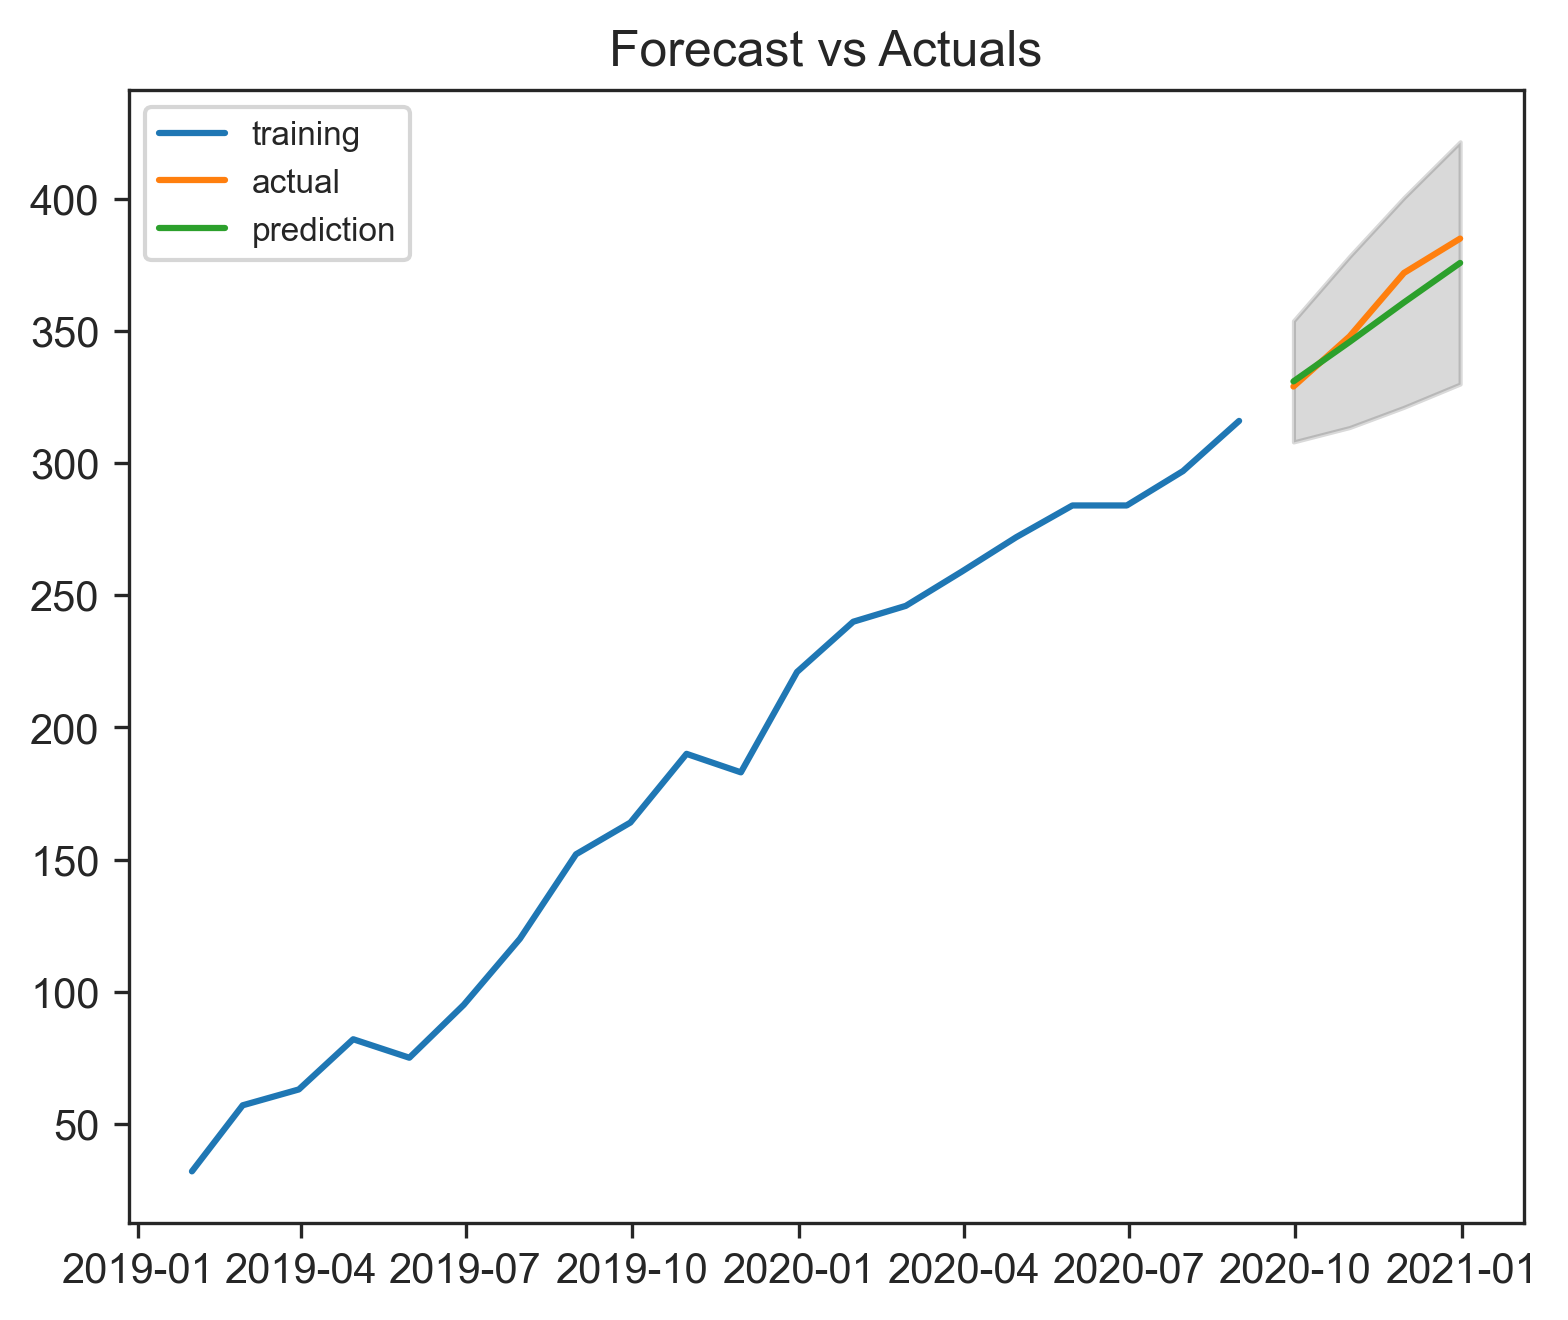

In [37]:
plt.figure(figsize=(6,5), dpi=300)
plt.plot(train_data['Price'], label='training')
plt.plot(test_data['Price'], label='actual')
plt.plot(fc_series, label='prediction')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Forecast Vs Actual.jpeg')
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
fc_series

Months
2020-09-30    330.947368
2020-10-31    345.894737
2020-11-30    360.842105
2020-12-31    375.789474
dtype: float64

In [40]:
test_data['Price']

Months
2020-09-30    329.0
2020-10-31    348.0
2020-11-30    372.0
2020-12-31    385.0
Name: Price, dtype: float64

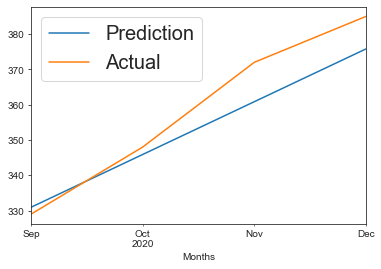

In [41]:
fc_series.rename('Prediction').plot(legend=True)
test_data['Price'].rename('Actual').plot(legend=True)

In [42]:
sqrt(mean_squared_error(fc_series, test_data['Price']))

7.374903163832004